In [0]:
#imports
import csv
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
from tabulate import tabulate



In [3]:
# Part (a)
processedData = []
cities = []
with open('places.txt', newline='') as csvfile:
  csvData = 'City ' + csvfile.read()
  datareader = csv.reader(csvData.splitlines(), delimiter=' ', skipinitialspace=True)
  header = next(datareader)
  for row in datareader:
    cities.append(row[0].strip())
    processedData.append(row[1:10])

processedData = np.array(processedData).astype(np.int)
# datareader.seak(0)
# header.extend(list(processedData[0:10]))
print(cities[0:5])
# print("\n", header[1:10])
# print(processedData[0:10])
table = [header[1:10]]
table.extend(processedData[0:10])
print(tabulate(table))

['Abilene,TX', 'Akron,OH', 'Albany,GA', 'Albany-Schenectady-Troy,NY', 'Albuquerque,NM']
-------  -----------  --------  -----  ------  ----  ----  -------  ----
Climate  HousingCost  HlthCare  Crime  Transp  Educ  Arts  Recreat  Econ
521      6200         237       923    4031    2757  996   1405     7633
575      8138         1656      886    4883    2438  5564  2632     4350
468      7339         618       970    2531    2560  237   859      5250
476      7908         1431      610    6883    3399  4655  1617     5864
659      8393         1853      1483   6558    3026  4496  2612     5727
520      5819         640       727    2444    2972  334   1018     5254
559      8288         621       514    2881    3144  2333  1117     5097
537      6487         965       706    4975    2945  1487  1280     5795
561      6191         432       399    4246    2778  256   1210     4230
609      6546         669       1073   4902    2852  1235  1109     6241
-------  -----------  --------  ----

In [4]:
# Part (b) Replacing each value 

log_processedData = np.log10(processedData)
# Since column index 1 and 3 inversely affect the score
log_processedData[:, 1:2] = log_processedData[:, 1:2] * -1
log_processedData[:, 3:4] = log_processedData[:, 3:4] * -1
print(log_processedData)

[[ 2.71683772 -3.79239169  2.37474835 ...  2.99825934  3.14767632
   3.88269526]
 [ 2.75966784 -3.91051769  3.21906033 ...  3.74538712  3.42028588
   3.63848926]
 [ 2.67024585 -3.86563689  2.79098848 ...  2.37474835  2.93399316
   3.7201593 ]
 ...
 [ 2.73239376 -3.92277734  2.85308953 ...  3.0094509   2.92531209
   3.69425411]
 [ 2.75587486 -3.84639897  3.04020663 ...  3.44669247  3.12287092
   3.59039595]
 [ 2.78390358 -3.89625056  2.32633586 ...  2.08635983  2.96284268
   3.67154309]]


In [13]:
# Part (c)

means = np.mean(log_processedData, axis=0)
centeredData = log_processedData - means
print(centeredData)

U, sigma, Vt = svd(centeredData)

[[-0.00165641  0.11509947 -0.58073822 ... -0.2079501  -0.07889102
   0.14851314]
 [ 0.04117371 -0.00302653  0.26357377 ...  0.53917768  0.19371854
  -0.09569287]
 [-0.04824828  0.04185427 -0.16449809 ... -0.83146109 -0.29257419
  -0.01402282]
 ...
 [ 0.01389963 -0.01528619 -0.10239703 ... -0.19675854 -0.30125526
  -0.03992801]
 [ 0.03738073  0.06109218  0.08472006 ...  0.24048303 -0.10369643
  -0.14378618]
 [ 0.06540945  0.01124059 -0.6291507  ... -1.11984961 -0.26372467
  -0.06263904]]


In [14]:
# Part (d)

v1 = Vt.T[:,0]
v2 = Vt.T[:,1]
print("First Singular Vector v1\n ",v1)
print("\nSecond Singular Vector v2\n", v2)

First Singular Vector v1
  [ 0.03507288 -0.09335159  0.40776448 -0.10044536  0.15009714  0.03215319
  0.87434057  0.15899622  0.01949418]

Second Singular Vector v2
 [ 0.0088782  -0.00923057 -0.85853187 -0.22042372  0.05920111 -0.06058858
  0.30380632  0.33399255  0.0561011 ]


- v1: Appers to correlates most to the 7th column 'Arts'
- v2: Appears to correlates to 8th column 'Recreation'

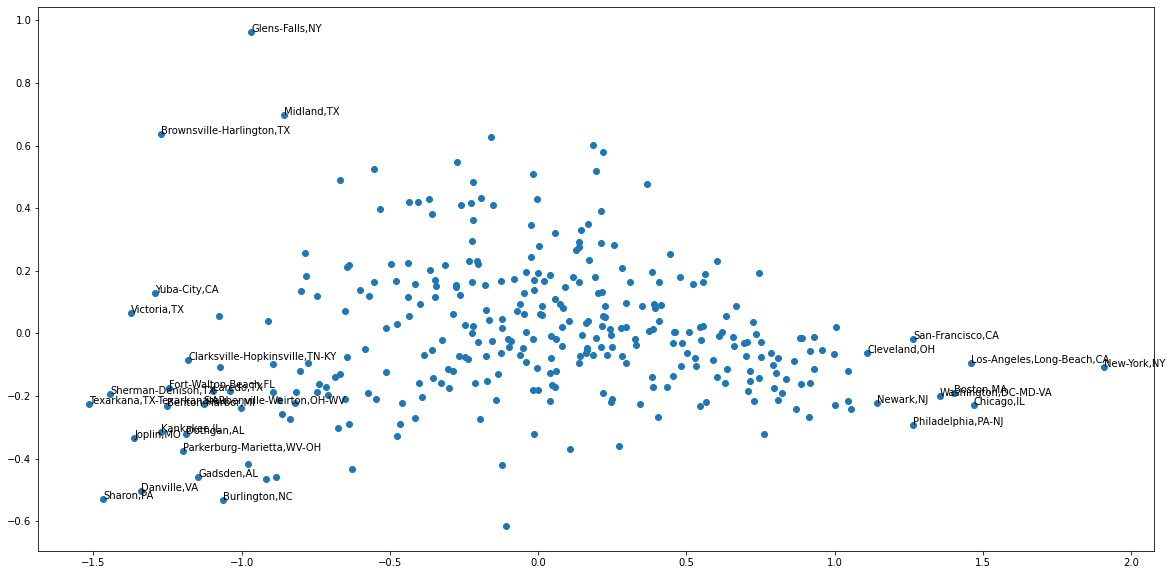

In [17]:
# Part (e)
# cov_matrix = np.cov(centeredData)

principal_components = (U[:, :9] * sigma)
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(principal_components[:, :1], principal_components[:, 1:2])

for i, city in enumerate(cities):
  coords = (principal_components[:, :1][i], principal_components[:, 1:2][i])
  # Add City Names as annotations to outliers
  if np.linalg.norm(coords) > 1.1:
    ax.annotate(city, coords)

First Singular Vector v1
  [ 0.20641395 -0.35652161  0.46021465 -0.28129838  0.35115078  0.27529264
  0.46305449  0.32788791  0.13541225]

Second Singular Vector v2
 [ 0.21783531 -0.250624   -0.29946528 -0.35534227 -0.17960448 -0.48338209
 -0.19478992  0.38447464  0.47128328]


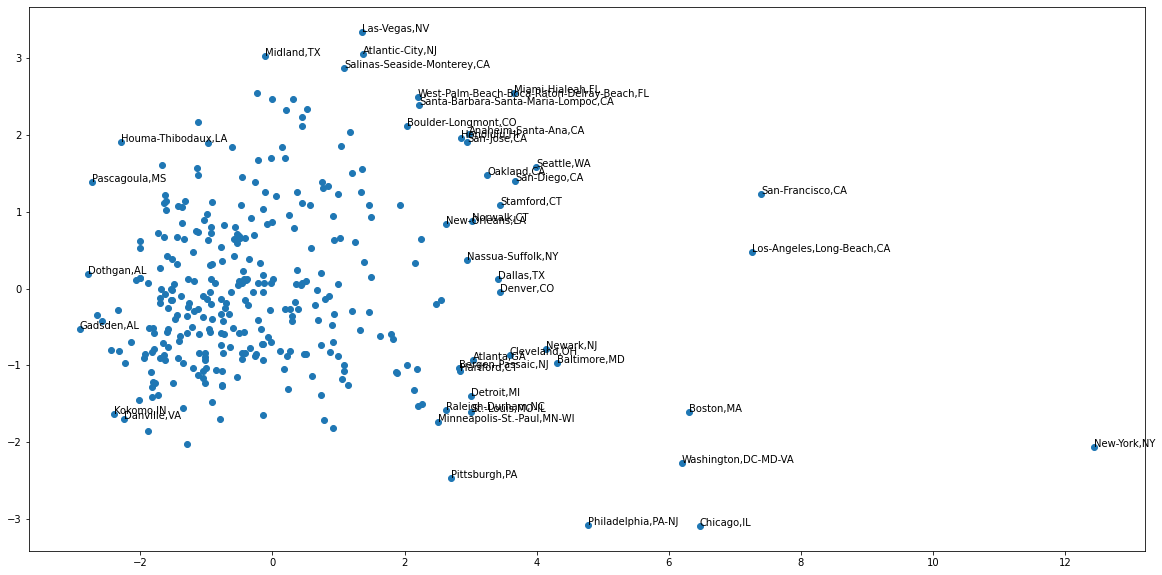

In [11]:
# Part (f)

means = np.mean(processedData, axis=0)
deviations = np.std(processedData, axis=0)

z_processedData = (processedData - means) / deviations

# Since column index 1 and 3 inversely affect the score
z_processedData[:, 1:2] = z_processedData[:, 1:2] * -1
z_processedData[:, 3:4] = z_processedData[:, 3:4] * -1

means = np.mean(z_processedData, axis=0)
centeredData = z_processedData - means

cov_matrix = np.cov(centeredData)

U, sigma, Vt = svd(centeredData)
principal_components = (U[:, :9] * sigma)
# print(principal_components)
# print("\n")

# First 2 Principal Components
v1 = Vt.T[:,0]
v2 = Vt.T[:,1]
print("First Singular Vector v1\n ",v1)
print("\nSecond Singular Vector v2\n", v2)


fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(principal_components[:, :1], principal_components[:, 1:2])

for i, city in enumerate(cities):
  coords = (principal_components[:, :1][i], principal_components[:, 1:2][i])
  # Add City Names as annotations to outliers
  if np.linalg.norm(coords) > 2.75:
    ax.annotate(city, coords)


- v1: Appers to correlates most to the 7th column 'Arts'

- v2: Appears to correlates to 9th column 'Economic Welfare'


While the focus of the first principal component stayed on column 7, the focus of the second principal component shifted from column 8 to column 9. 

Also, as we can see in the above plots, the cities on the outskirts of the plot spread out farther and more sparsely when the data is pre processed using z-scores.